In [1]:
# load libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
import geojson
import fiona
from pathlib import Path

import json
import matplotlib as mpl
import shapely
import shapely.geometry as sg
import mapclassify
import matplotlib.cm as cm, matplotlib.font_manager as fm

from datetime import datetime as dt
from shapely.geometry import Polygon
from geopy.distance import great_circle
from geopandas import GeoDataFrame
import descartes
import pysal
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [2]:
# creating json file
gdf = gpd.read_file(r'G:\My Drive\Data\Precinct Data CA 2016\Geo_Files\precinct_data_2016_by_ct_export_submitted.geojson')

In [3]:
gdf.head(2)

,GEOID,democratic,republican,total_votes_by_ct,dem_pct_vote,geometry
0,6065051200,224.0,242.0,466.0,48.1,"MULTIPOLYGON (((-117.14876 33.47290, -117.1493..."
1,6073020029,279.0,223.0,502.0,55.6,"POLYGON ((-117.18903 33.14812, -117.18895 33.1..."


In [4]:
total_votes = gdf['total_votes_by_ct'].sum()
total_votes

282901.0

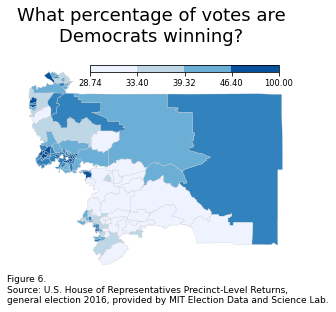

In [5]:

fig, ax = plt.subplots(1, figsize=(5, 4.5))
ax.axis('off')

cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', [ '#eff3ff', '#bdd7e7', '#6baed6', '#3182bd', '#08519c'], 5)

gdf.plot(cmap=cmap, scheme='quantiles', ax=ax, column='dem_pct_vote', linewidth=0.3, edgecolor='0.8')

# The tick marks we want for our map.  We'll pull these directly from the mapclassify code.
bounds = list(mapclassify.Quantiles(gdf['dem_pct_vote'], k=5).bins)

# This controls how the colors are scaled using the above bounds
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, clip=True)

# This sets where the colorbar goes and its size
cbax = fig.add_axes([.33, .80, 0.525, 0.02])

cb2 = mpl.colorbar.ColorbarBase(cbax, cmap=cmap, norm=norm, ticks=bounds, orientation='horizontal')

#cb2.set_label(r'%')
cb2.ax.xaxis.set_label_position('bottom')
cb2.ax.xaxis.label.set_multialignment('left')
plt.setp(plt.getp(cb2.ax.axes, 'xticklabels'), fontsize='small')

# add a title
#fig.suptitle('What percentage of votes are Democrats winning?', x=.3, y=1, fontsize=18, fontweight= 3)
fig.suptitle('What percentage of votes are' + "\n" + 'Democrats winning?', x=.5, y=1, fontsize=18, fontweight= 3)


# add a footnote
plt.figtext(.1, .08, r'Figure 6.' + "\n" + 'Source: U.S. House of Representatives Precinct-Level Returns,' + 
            "\n" + 'general election 2016, provided by MIT Election Data and Science Lab.',
             ha='left', va='bottom', fontsize=9)

#this will save the figure as a high-res png. you can also save as svg
fig.savefig(r'G:\My Drive\Data\CA Congressional District_Compilation\Graphs\PowerPoint_Dem_pct_maps.png', 
            bbox_inches='tight',pad_inches=0.1, dpi=200)